
# Type 1 and Type 2 errors - Lab

## Introduction

In this lab, you'll run some of your own simulations to learn more about type 1 and type 2 errors. Remember that, the result of a statistical hypothesis test and the corresponding decision of whether to reject or accept the null hypothesis is not infallible. A test provides evidence for or against the null hypothesis and then you decide whether to accept or reject it based on that evidence, but the evidence may lack the strength to arrive at the correct conclusion. Incorrect conclusions made from hypothesis tests fall in one of two categories, i.e. [Type 1 and Type 2 erros](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors) By running some of these simulations, you should have a better idea of why a 95% confidence level is often used for hypothesis testing.


## Objectives

You will be able to:

* Explain why alpha = 0.05 is chosen as the cut off point for rejecting Null hypothesis in most scientific experiments
* Simulate Type I and Type II errors with alpha control to observe the output of an experiment
* Describe and differentiate between TYPE I and TYPE II errors
* Understand alpha and beta for representing false positive and false negative values

## Alpha and Beta

**Alpha (α):** is the probability of a type I error i.e. finding a difference when a difference does not exist. 

Most medical literature uses an alpha cut-off of 5% (0.05), indicating a 5% chance that a significant difference is actually due to chance and is not a true difference. 

**Beta (β):** is the probability of a type II error i.e. not detecting a difference when one actually exists. 

Beta is directly related to study power (Power = 1 – β) which we shall see in the next lesson. Most medical literature uses a beta cut-off of 20% (0.2), indicating a 20% chance that a significant difference is missed. 


Let's try to simulate and visualize this phenomenon using some Python code.

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import random 

import seaborn as sns
sns.set(color_codes=True)

 First, we create a population of 1000 elements with a mean of 100 and a standard deviation of 20.

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


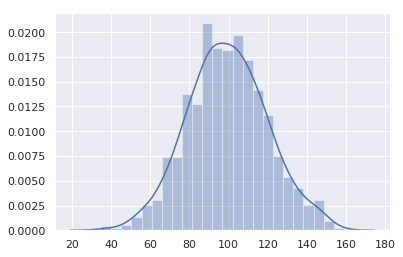

In [4]:
# Create a population with mean=100 and sd=20 and size = 1000
pop = np.random.normal(100, 20, 1000)
pop.dtype
sns.distplot(pop)

Lets take two sample from this population and comment of the difference between their and means and standard deviations. How would you ensure the independance between elements of these samples? 

In [5]:
k = 100
sample1 = np.random.choice(pop,100,replace=True)

print ("Sample 1 Summary")
stats.describe(sample1)

Sample 1 Summary


DescribeResult(nobs=100, minmax=(34.868822352638716, 145.73916770215266), mean=100.47609070255469, variance=475.40904044774175, skewness=-0.3525462661490154, kurtosis=0.30610644677787047)

In [7]:
sample2 = np.random.choice(pop,100,replace=True)
print ("Sample 2 Summary")
stats.describe(sample2)

Sample 2 Summary


DescribeResult(nobs=100, minmax=(39.872678768278156, 153.44688719472845), mean=99.09016433882898, variance=417.34618454258776, skewness=0.035929767858951474, kurtosis=0.05064775056401105)

We can see can see that if we take two samples from this population, the difference between the mean of samples 1 and 2 is very small small (this can be tried repeatedly). We must sample with replacement in order to ensure the independance assumption between elements of the sample. 

There is, however, still a probability of seeing very large difference between values, even though they’re estimates of the same population parameters. In a statistical setting we’d interpret these unusually large differences as evidence that the two samples are statistically different. It depends on how you define statistical significance. In statistical tests this is done by setting a significance threshold `α` (alpha). Alpha controls how often we’ll get a type 1 error. A type 1 error occurs when our statistical test erroneously indicates a significant result.

We can run two sample t-test with independance assumption on these sample and as expected, the null hypothesis will be proven true due to similarities between distributions. We can also visualize the distribution to confirm the similarity between means and SDs. 

In [8]:
# test the sample means
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=0.46384614961278214, pvalue=0.6432675064514339)

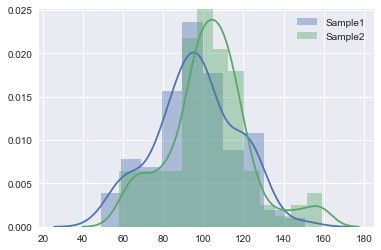

In [6]:
plt.figure("Test Samples")
sns.distplot(sample1, label='Sample1') 
sns.distplot(sample2, label='Sample2')
plt.legend()
plt.show()


## Simulating Type I and II errors

### Type I error
TYPE I error describes a situation where you reject the null hypothesis when it is actually true. This type of error is also known as a "false positive" or "false hit". The type 1 error rate is equal to the significance level α, so setting a higher confidence level (and therefore lower alpha) reduces the chances of getting a false positive.



### How alpha affects the prevalence of TYPE I errors.

Next, we shall see how alpha affects the rate of type 1 errors. 

> **Exercise:** Write a routine in Python to encapsulate the code shown above in order to repeat hypothesis tests on two randomly drawn distribution. The t-test will mostly fail to reject the null hypothesis, except, when by random chance you get a set of **extremely** different samples thus reject the null hypothesis (TYPE I ERROR). The frequency of such bad results depends upon the value of alpha. 

* Step 1: Create a population distribution (as shown above) 
* Step 2: Specify a number of hypothesis tests in numTests = 1000
* Step 3: Create a list of alpha values to explore (alpha_set) = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
* Step 4: Create a pandas dataframe (sig_tests) to store 1000x5 = 5000 test results. 
* Step 5: Repeatedly take two random samples from population and run independant t-tests. 
* Step 6: Store P_value, alpha and a boolean variable to show whether null hypothesis was rejected or not (i.e. if p-value is less than alpha), for each of 5000 tests. 
* Step 7: Summarize/aggregate the results for presentation in a meaningful manner. 


In [11]:
# Solution 

import pandas as pd

numTests = 100
alphaSet = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
columns = ['err', 'p_val', 'alpha']
sigTests = pd.DataFrame(columns=columns)

# Create a population with mean=100 and sd=20 and size = 1000
pop = np.random.normal(100, 20, 1000)

# Create a counter for dataframe index values
counter = 1



In [14]:
# Run the t-test on samples from distribution numTests x slphaSet times

for i in range(1,numTests+1):
    
    for alpha in alphaSet:

        # take two samples from the same population
            samp1 = np.random.choice(pop,100,replace=True)
            samp2 = np.random.choice(pop,100,replace=True)

            # test sample means
            result = stats.ttest_ind(samp1, samp2)
            print (result)

            # Evaluate whether Null hypothesis for TYPE I error
            if result[1] < alpha:
                 sigTests.loc[counter] = [1, result[1], alpha]
            else:
                 sigTests.loc[counter] = [0, result[1], alpha]

            counter += 1

Ttest_indResult(statistic=0.32824810708087965, pvalue=0.7430709419595054)
Ttest_indResult(statistic=-0.3702839591554466, pvalue=0.7115667205097328)
Ttest_indResult(statistic=-0.616523598310656, pvalue=0.5382572015210396)
Ttest_indResult(statistic=1.2396467333759675, pvalue=0.21657332891809594)
Ttest_indResult(statistic=1.4134423906417943, pvalue=0.15909589848380265)
Ttest_indResult(statistic=-1.1660293242427864, pvalue=0.24500520693854513)
Ttest_indResult(statistic=-0.13835779491939207, pvalue=0.8900982612222503)
Ttest_indResult(statistic=0.7500273810428698, pvalue=0.45412850029650875)
Ttest_indResult(statistic=0.1578164579175863, pvalue=0.8747622578194093)
Ttest_indResult(statistic=0.5535196775673574, pvalue=0.5805321064549367)
Ttest_indResult(statistic=0.18761308900917742, pvalue=0.8513720861998963)
Ttest_indResult(statistic=0.8350354930670667, pvalue=0.40470415149426253)
Ttest_indResult(statistic=0.5914371117323214, pvalue=0.554902205301885)
Ttest_indResult(statistic=1.8421968700437

Ttest_indResult(statistic=-0.8576042558489491, pvalue=0.3921478956924853)
Ttest_indResult(statistic=-0.5361309907655062, pvalue=0.5924698104558485)
Ttest_indResult(statistic=0.7922878559330473, pvalue=0.4291410749861698)
Ttest_indResult(statistic=-2.0309406626352375, pvalue=0.043597909964832135)
Ttest_indResult(statistic=-0.225907689820939, pvalue=0.8215062374923878)
Ttest_indResult(statistic=-1.2212659885633244, pvalue=0.2234375081273334)
Ttest_indResult(statistic=0.149534894755232, pvalue=0.8812837807428919)
Ttest_indResult(statistic=-0.3557133852342851, pvalue=0.7224339044196576)
Ttest_indResult(statistic=-0.8668973727862671, pvalue=0.3870475763958364)
Ttest_indResult(statistic=-0.3426106276016175, pvalue=0.7322548399005744)
Ttest_indResult(statistic=-1.3393569210552483, pvalue=0.18198990158623155)
Ttest_indResult(statistic=0.9576673244274945, pvalue=0.3393984125760239)
Ttest_indResult(statistic=-1.1486679012294103, pvalue=0.2520787202190003)
Ttest_indResult(statistic=1.116531726502

Ttest_indResult(statistic=-1.8642020808147943, pvalue=0.06377346542246572)
Ttest_indResult(statistic=-0.31939040000333885, pvalue=0.7497672124403615)
Ttest_indResult(statistic=0.5642108632579227, pvalue=0.5732491845063312)
Ttest_indResult(statistic=-0.3558096528791728, pvalue=0.7223619166754967)
Ttest_indResult(statistic=2.0963932260798117, pvalue=0.037317627747362025)
Ttest_indResult(statistic=1.1451495366288154, pvalue=0.25352950842995564)
Ttest_indResult(statistic=-1.6033445001638296, pvalue=0.11045260229057836)
Ttest_indResult(statistic=-1.4133618409756528, pvalue=0.15911953878832474)
Ttest_indResult(statistic=0.9315334512099155, pvalue=0.3527121269285931)
Ttest_indResult(statistic=-0.007950849098700035, pvalue=0.9936642121852057)
Ttest_indResult(statistic=-0.27019287943972775, pvalue=0.7872932847047418)
Ttest_indResult(statistic=-0.8519953101632415, pvalue=0.3952460229335236)
Ttest_indResult(statistic=-1.6066639197474977, pvalue=0.1097216733094579)
Ttest_indResult(statistic=-0.937

Ttest_indResult(statistic=0.024342921748141195, pvalue=0.9806035921214838)
Ttest_indResult(statistic=0.40874377019875996, pvalue=0.683169450268095)
Ttest_indResult(statistic=1.7891862462399573, pvalue=0.07511334761573282)
Ttest_indResult(statistic=-0.006025143868710114, pvalue=0.9951987259813869)
Ttest_indResult(statistic=-0.5518229385460888, pvalue=0.5816919420741123)
Ttest_indResult(statistic=0.7960530025197821, pvalue=0.4269546007547963)
Ttest_indResult(statistic=0.0517870691388049, pvalue=0.9587505674769667)
Ttest_indResult(statistic=-0.8177434975807459, pvalue=0.4144866215165881)
Ttest_indResult(statistic=0.5696211096144056, pvalue=0.5695803930629971)
Ttest_indResult(statistic=2.179581671957002, pvalue=0.030468435757558976)
Ttest_indResult(statistic=1.4261454278326526, pvalue=0.1554011293937849)
Ttest_indResult(statistic=-0.7940085677863468, pvalue=0.4281410204261791)
Ttest_indResult(statistic=-0.25819659068399536, pvalue=0.7965233696584846)
Ttest_indResult(statistic=-0.8996428717

In [15]:
sigTests

,err,p_val,alpha
1,0.0,0.356164,0.001
2,0.0,0.666956,0.010
3,0.0,0.089677,0.050
4,0.0,0.536288,0.100
5,0.0,0.859992,0.200
6,0.0,0.661279,0.500
7,0.0,0.841202,0.001
8,0.0,0.552417,0.010
9,0.0,0.726400,0.050
10,0.0,0.779478,0.100


Now we have to summarize the results, this is done using pandas groupby() method which sums the “err” column for each level of alpha. The groupby method iterates over each value of alpha, selecting the type 1 error column for all rows with a specific level of alpha and then applies the sum function to the selection. 

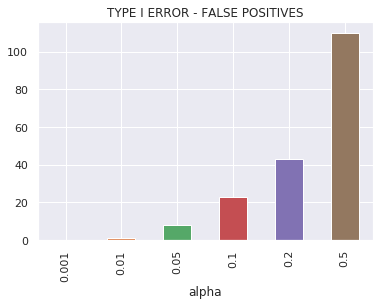

In [16]:
# group type 1 error by values of alpha
group_error = sigTests.groupby('alpha')['err'].sum()
group_error.plot.bar(title = "TYPE I ERROR - FALSE POSITIVES")

Grouped data clearly shows that as value of alpha is increases from .001 to 0.5, the probability of TYPE I errors also increase.  

### Type II error 

This error describes a situation where you fail to reject the null hypothesis when it is actually false. Type II error is also known as a "false negative" or "miss". The higher your confidence level, the more likely you are to make a type II error.

## How alpha affects the prevalence of TYPE II errors.

> **Exercise** Write a code similar to above except samples should be taken from two different populations. introduce a new variable to represent the difference between two poulations. The hypothesis test should, in most cases, reject the Null hypothesis as samples belong to different populations, except, in extreme cases where there is no significant difference between samples i.e. a TYPE II error (False Negatives). Code should reflect how rate of false negatives is affected by alpha. 

In [11]:
# Solution

numTests = 1000
diff = 10
ahpha_set =  [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
columns = ['err', 'p_val', 'alpha']
sigTests2 = pd.DataFrame(columns=columns)

counter = 1

for i in range(1,numTests+1):
    
    for alpha in alphaSet:

        # take two samples from different populations
            samp1 = np.random.normal(100, 20, 100)
            samp2 = np.random.normal(100+diff, 20, 100)

            # test sample means
            result = stats.ttest_ind(samp1, samp2)

            # Evaluate the Null hypothesis for TYPE II error (Note > as compared to < previously)
            if result[1] > alpha:
                 sigTests2.loc[counter] = [1, result[1], alpha]
            else:
                 sigTests2.loc[counter] = [0, result[1], alpha]

            counter += 1

Count of number of TYPE II errors according to alpha

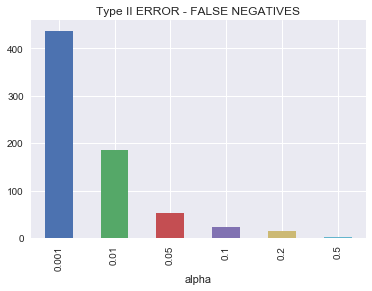

In [12]:
group_error2 = sigTests2.groupby('alpha')['err'].sum()

group_error2.plot.bar(title = "Type II ERROR - FALSE NEGATIVES")

Grouped data clearly shows that as value of alpha is increases from .001 to 0.5, the probability of TYPE II errors decreases. 

### Why is an α level of 0.05 chosen as a cut-off for statistical significance?

The α level of 0.05 is considered the best balance to avoid excessive type I or type II errors. 


If we decide to use a large value for alpha : 

* Increases the chance of rejecting the null hypothesis
* The risk of a Type II error (false negative) is REDUCED
* Risk of a Type I error (false positive) is INCREASED

similarly, if we decide to use a very small value of alpha, it'll change the outcome as:
* Increases the chance of accepting the null hypothesis
* The risk of a Type I error (false positive) is REDUCED
* Risk of a Type II error (false negative) is INCREASED

From above, we can see that in statistical hypothesis testing, the more we try and avoid a Type I error (false positive), the more likely a Type II error (false negative) will occur. 

## Summary

The statistical key point here is that there is always a trade off between false positives and false negatives. By increasing alpha the number of false positives increases but the number of false negatives decreases as shown in bar graphs. The value of alpha=0.05 is considered a reasonable compromise between these two types of errors. Within the concept of “signifigance” there is embedded a trade-off between these two types of errors. 

> Think of “signifigance” as a compromise, between false positives and negatives, not as absolute determination.